# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [66]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [67]:
train, test = keras.datasets.cifar10.load_data()

In [68]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [69]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [70]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [71]:
## 超參數設定
"""
Set your required experiment parameters
"""

## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.75
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [73]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 

196/196 [==============================] - 2s 9ms/step - loss: 0.7752 - accuracy: 0.7281 - val_loss: 1.7165 - val_accuracy: 0.4847
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,89

196/196 [==============================] - 3s 15ms/step - loss: 2.3087 - accuracy: 0.0972 - val_loss: 2.3135 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 2.3077 - accuracy: 0.1019 - val_loss: 2.3074 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________

196/196 [==============================] - 2s 10ms/step - loss: 0.8460 - accuracy: 0.6936 - val_loss: 1.7004 - val_accuracy: 0.4883
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8365 - accuracy: 0.7004 - val_loss: 1.6622 - val_accuracy: 0.4824
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8175 - accuracy: 0.7088 - val_loss: 1.7070 - val_accuracy: 0.4747
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___

196/196 [==============================] - 2s 10ms/step - loss: 2.3072 - accuracy: 0.0982 - val_loss: 2.3092 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3070 - accuracy: 0.1034 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3066 - accuracy: 0.0988 - val_loss: 2.3093 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3066 - accuracy: 0.1032 - val_loss: 2.3140 - val_accuracy: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)      

196/196 [==============================] - 2s 9ms/step - loss: 1.2498 - accuracy: 0.5599 - val_loss: 1.4623 - val_accuracy: 0.4777
Epoch 47/50
196/196 [==============================] - 2s 9ms/step - loss: 1.2445 - accuracy: 0.5644 - val_loss: 1.4233 - val_accuracy: 0.4946
Epoch 48/50
196/196 [==============================] - 2s 9ms/step - loss: 1.2433 - accuracy: 0.5635 - val_loss: 1.5125 - val_accuracy: 0.4571
Epoch 49/50
196/196 [==============================] - 2s 9ms/step - loss: 1.2420 - accuracy: 0.5630 - val_loss: 1.6361 - val_accuracy: 0.4273
Epoch 50/50
196/196 [==============================] - 2s 9ms/step - loss: 1.2247 - accuracy: 0.5674 - val_loss: 1.3764 - val_accuracy: 0.5100
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)] 

196/196 [==============================] - 3s 15ms/step - loss: 1.7027 - accuracy: 0.3923 - val_loss: 1.9746 - val_accuracy: 0.3361
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7238 - accuracy: 0.3849 - val_loss: 1.9248 - val_accuracy: 0.3300
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7056 - accuracy: 0.3883 - val_loss: 1.7309 - val_accuracy: 0.3881
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7086 - accuracy: 0.3865 - val_loss: 1.7588 - val_accuracy: 0.3693
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7013 - accuracy: 0.3910 - val_loss: 1.7963 - val_accuracy: 0.3607
Epoch 50/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7000 - accuracy: 0.3910 - val_loss: 1.7873 - val_accuracy: 0.3679
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "model"
___________________________

196/196 [==============================] - 2s 10ms/step - loss: 1.0799 - accuracy: 0.6244 - val_loss: 1.3559 - val_accuracy: 0.5265
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0708 - accuracy: 0.6262 - val_loss: 1.4369 - val_accuracy: 0.4982
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0609 - accuracy: 0.6273 - val_loss: 1.4240 - val_accuracy: 0.4985
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0609 - accuracy: 0.6314 - val_loss: 1.3494 - val_accuracy: 0.5283
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0478 - accuracy: 0.6366 - val_loss: 1.4288 - val_accuracy: 0.4990
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0474 - accuracy: 0.6383 - val_loss: 1.3240 - val_accuracy: 0.5377
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0373 - accuracy: 0.6412 - val_loss: 1.3352 - val_accuracy: 0.5274
Expe

196/196 [==============================] - 2s 11ms/step - loss: 1.4804 - accuracy: 0.4722 - val_loss: 1.5603 - val_accuracy: 0.4501
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4591 - accuracy: 0.4790 - val_loss: 1.5423 - val_accuracy: 0.4531
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4425 - accuracy: 0.4827 - val_loss: 1.5419 - val_accuracy: 0.4552
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4647 - accuracy: 0.4769 - val_loss: 1.5780 - val_accuracy: 0.4444
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4361 - accuracy: 0.4864 - val_loss: 1.6113 - val_accuracy: 0.4376
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4782 - accuracy: 0.4750 - val_loss: 1.6094 - val_accuracy: 0.4322
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4758 - accuracy: 0.4733 - val_loss: 1.5711 - val_accuracy: 0.4383
Epoc

196/196 [==============================] - 2s 9ms/step - loss: 1.7144 - accuracy: 0.4017 - val_loss: 1.7151 - val_accuracy: 0.4034
Epoch 43/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7046 - accuracy: 0.4073 - val_loss: 1.7087 - val_accuracy: 0.4078
Epoch 44/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7000 - accuracy: 0.4057 - val_loss: 1.7046 - val_accuracy: 0.4081
Epoch 45/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7021 - accuracy: 0.4080 - val_loss: 1.7000 - val_accuracy: 0.4107
Epoch 46/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7009 - accuracy: 0.4070 - val_loss: 1.6989 - val_accuracy: 0.4111
Epoch 47/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6865 - accuracy: 0.4153 - val_loss: 1.6950 - val_accuracy: 0.4073
Epoch 48/50
196/196 [==============================] - 2s 9ms/step - loss: 1.6850 - accuracy: 0.4120 - val_loss: 1.6904 - val_accuracy: 0.4115
Epoch 49/50

196/196 [==============================] - 3s 15ms/step - loss: 0.8717 - accuracy: 0.6884 - val_loss: 1.7838 - val_accuracy: 0.4712
Epoch 42/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8512 - accuracy: 0.6931 - val_loss: 1.8219 - val_accuracy: 0.4780
Epoch 43/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8467 - accuracy: 0.6954 - val_loss: 1.7603 - val_accuracy: 0.4724
Epoch 44/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8193 - accuracy: 0.7064 - val_loss: 1.8136 - val_accuracy: 0.4898
Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8189 - accuracy: 0.7064 - val_loss: 1.8849 - val_accuracy: 0.4896
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 0.7920 - accuracy: 0.7174 - val_loss: 1.9071 - val_accuracy: 0.4661
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 0.7964 - accuracy: 0.7163 - val_loss: 1.9191 - val_accuracy: 0.4834
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.5623 - accuracy: 0.4541 - val_loss: 1.5779 - val_accuracy: 0.4421
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5554 - accuracy: 0.4574 - val_loss: 1.5660 - val_accuracy: 0.4513
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5484 - accuracy: 0.4573 - val_loss: 1.5655 - val_accuracy: 0.4511
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5372 - accuracy: 0.4602 - val_loss: 1.5592 - val_accuracy: 0.4533
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5374 - accuracy: 0.4645 - val_loss: 1.5583 - val_accuracy: 0.4568
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5371 - accuracy: 0.4655 - val_loss: 1.5727 - val_accuracy: 0.4455
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5373 - accuracy: 0.4601 - val_loss: 1.5648 - val_accuracy: 0.4489
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.8029 - accuracy: 0.7122 - val_loss: 1.5560 - val_accuracy: 0.5121
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7767 - accuracy: 0.7234 - val_loss: 1.5863 - val_accuracy: 0.5179
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7793 - accuracy: 0.7212 - val_loss: 1.5705 - val_accuracy: 0.5231
Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7470 - accuracy: 0.7315 - val_loss: 1.5727 - val_accuracy: 0.5202
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7224 - accuracy: 0.7420 - val_loss: 1.6195 - val_accuracy: 0.5268
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7263 - accuracy: 0.7415 - val_loss: 1.6585 - val_accuracy: 0.5183
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7083 - accuracy: 0.7484 - val_loss: 1.7007 - val_accuracy: 0.5154
Epoc

196/196 [==============================] - 2s 9ms/step - loss: 2.0697 - accuracy: 0.2821 - val_loss: 2.0673 - val_accuracy: 0.2797
Epoch 39/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0673 - accuracy: 0.2829 - val_loss: 2.0634 - val_accuracy: 0.2799
Epoch 40/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0611 - accuracy: 0.2835 - val_loss: 2.0594 - val_accuracy: 0.2820
Epoch 41/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0571 - accuracy: 0.2835 - val_loss: 2.0556 - val_accuracy: 0.2837
Epoch 42/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0525 - accuracy: 0.2896 - val_loss: 2.0518 - val_accuracy: 0.2861
Epoch 43/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0498 - accuracy: 0.2886 - val_loss: 2.0482 - val_accuracy: 0.2866
Epoch 44/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0486 - accuracy: 0.2902 - val_loss: 2.0446 - val_accuracy: 0.2872
Epoch 45/50

196/196 [==============================] - 3s 15ms/step - loss: 1.0718 - accuracy: 0.6239 - val_loss: 1.4045 - val_accuracy: 0.5034
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0628 - accuracy: 0.6301 - val_loss: 1.3824 - val_accuracy: 0.5206
Epoch 39/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0505 - accuracy: 0.6355 - val_loss: 1.3969 - val_accuracy: 0.5193
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0406 - accuracy: 0.6390 - val_loss: 1.3759 - val_accuracy: 0.5176
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0142 - accuracy: 0.6486 - val_loss: 1.4697 - val_accuracy: 0.4915
Epoch 42/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0199 - accuracy: 0.6453 - val_loss: 1.4451 - val_accuracy: 0.5148
Epoch 43/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0053 - accuracy: 0.6498 - val_loss: 1.4942 - val_accuracy: 0.4945
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.9015 - accuracy: 0.3352 - val_loss: 1.9028 - val_accuracy: 0.3335
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8955 - accuracy: 0.3387 - val_loss: 1.8989 - val_accuracy: 0.3380
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9023 - accuracy: 0.3372 - val_loss: 1.8954 - val_accuracy: 0.3380
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8935 - accuracy: 0.3418 - val_loss: 1.8920 - val_accuracy: 0.3390
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8826 - accuracy: 0.3487 - val_loss: 1.8888 - val_accuracy: 0.3412
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8844 - accuracy: 0.3449 - val_loss: 1.8854 - val_accuracy: 0.3398
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8791 - accuracy: 0.3444 - val_loss: 1.8823 - val_accuracy: 0.3435
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.9748 - accuracy: 0.6576 - val_loss: 1.3398 - val_accuracy: 0.5410
Epoch 36/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9774 - accuracy: 0.6568 - val_loss: 1.3491 - val_accuracy: 0.5357
Epoch 37/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9567 - accuracy: 0.6684 - val_loss: 1.3549 - val_accuracy: 0.5287
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9443 - accuracy: 0.6715 - val_loss: 1.3533 - val_accuracy: 0.5372
Epoch 39/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9312 - accuracy: 0.6752 - val_loss: 1.3358 - val_accuracy: 0.5405
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9190 - accuracy: 0.6815 - val_loss: 1.3357 - val_accuracy: 0.5401
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9082 - accuracy: 0.6889 - val_loss: 1.3188 - val_accuracy: 0.5472
Epoc

196/196 [==============================] - 2s 9ms/step - loss: 2.2670 - accuracy: 0.1455 - val_loss: 2.2666 - val_accuracy: 0.1481
Epoch 35/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2654 - accuracy: 0.1447 - val_loss: 2.2654 - val_accuracy: 0.1494
Epoch 36/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2646 - accuracy: 0.1478 - val_loss: 2.2642 - val_accuracy: 0.1510
Epoch 37/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2664 - accuracy: 0.1447 - val_loss: 2.2631 - val_accuracy: 0.1528
Epoch 38/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2630 - accuracy: 0.1495 - val_loss: 2.2619 - val_accuracy: 0.1536
Epoch 39/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2610 - accuracy: 0.1535 - val_loss: 2.2608 - val_accuracy: 0.1555
Epoch 40/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2604 - accuracy: 0.1521 - val_loss: 2.2597 - val_accuracy: 0.1572
Epoch 41/50

196/196 [==============================] - 3s 16ms/step - loss: 1.4869 - accuracy: 0.4817 - val_loss: 1.5292 - val_accuracy: 0.4572
Epoch 34/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4737 - accuracy: 0.4830 - val_loss: 1.5191 - val_accuracy: 0.4612
Epoch 35/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4777 - accuracy: 0.4882 - val_loss: 1.5157 - val_accuracy: 0.4659
Epoch 36/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4674 - accuracy: 0.4919 - val_loss: 1.5020 - val_accuracy: 0.4755
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4523 - accuracy: 0.4965 - val_loss: 1.5119 - val_accuracy: 0.4675
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4540 - accuracy: 0.4956 - val_loss: 1.4990 - val_accuracy: 0.4766
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4558 - accuracy: 0.4937 - val_loss: 1.4997 - val_accuracy: 0.4733
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2134 - accuracy: 0.2033 - val_loss: 2.2117 - val_accuracy: 0.2112
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2113 - accuracy: 0.2020 - val_loss: 2.2097 - val_accuracy: 0.2128
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2103 - accuracy: 0.2000 - val_loss: 2.2078 - val_accuracy: 0.2141
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2081 - accuracy: 0.2036 - val_loss: 2.2059 - val_accuracy: 0.2158
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2057 - accuracy: 0.2055 - val_loss: 2.2040 - val_accuracy: 0.2166
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2044 - accuracy: 0.2083 - val_loss: 2.2021 - val_accuracy: 0.2183
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2024 - accuracy: 0.2093 - val_loss: 2.2003 - val_accuracy: 0.2207
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.4741 - accuracy: 0.4908 - val_loss: 1.5120 - val_accuracy: 0.4715
Epoch 32/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4747 - accuracy: 0.4906 - val_loss: 1.5119 - val_accuracy: 0.4665
Epoch 33/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4614 - accuracy: 0.4936 - val_loss: 1.5069 - val_accuracy: 0.4682
Epoch 34/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4609 - accuracy: 0.4933 - val_loss: 1.5012 - val_accuracy: 0.4758
Epoch 35/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4596 - accuracy: 0.4964 - val_loss: 1.4986 - val_accuracy: 0.4741
Epoch 36/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4472 - accuracy: 0.5002 - val_loss: 1.4931 - val_accuracy: 0.4763
Epoch 37/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4404 - accuracy: 0.5008 - val_loss: 1.4881 - val_accuracy: 0.4809
Epoc

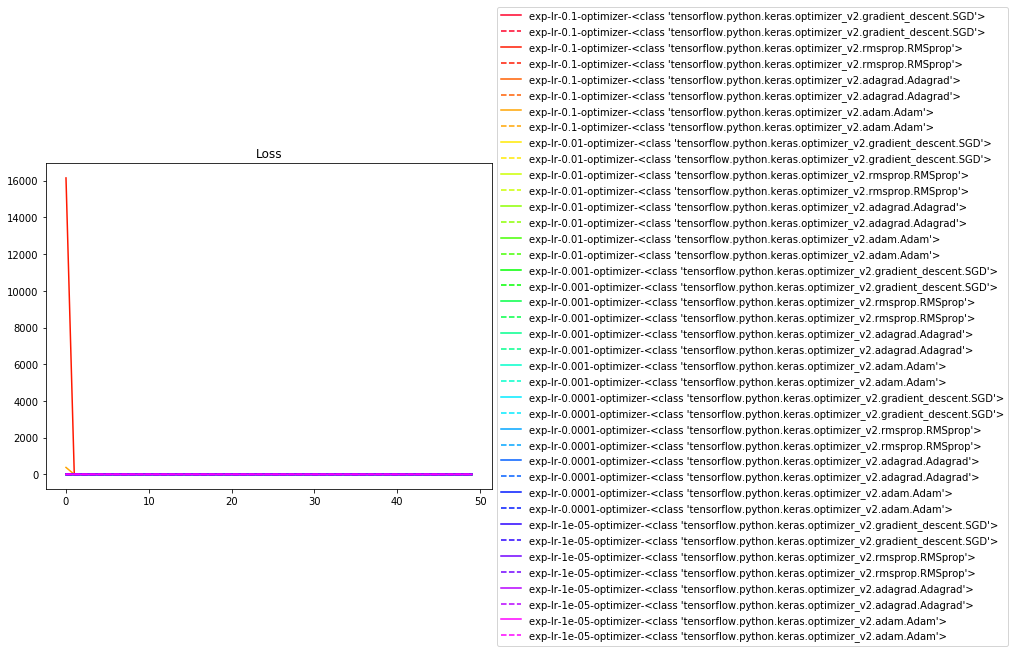

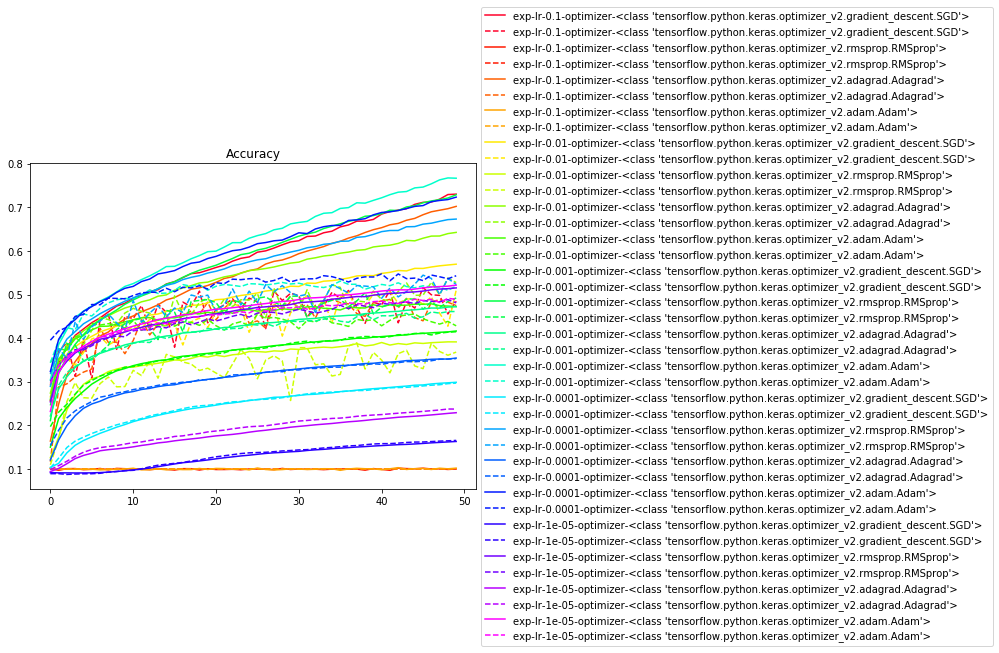

In [75]:
"""
將實驗結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()